In [212]:
%pip install mysql-connector-python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy import stats

from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering


Note: you may need to restart the kernel to use updated packages.


In [213]:
#1. Import the required libraries and load the data
# Load the required libraries and read the dataset.
#   Check the first few samples, shape, info of the data and try to familiarize yourself with different 

df = pd.read_csv('C://pro9//Copy of events.csv')
df.head()




,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [214]:
dfe=df.dropna()

In [215]:

df1 = pd.read_csv('C://pro9//Copy of gender_age.csv')
df1.head()
dfg=df1.dropna()

In [216]:
df2 = pd.read_csv('C://pro9//Copy of phone_device.csv')
df2.head()
dfp=df2.dropna()

In [217]:
dfe.shape

(3252950, 5)

In [218]:
dfg.shape

(74645, 4)

In [219]:
dfp.shape

(187245, 3)

In [220]:
#2. Data cleansing and Exploratory data analysis: [ Score: 8 point
# Check if there are any duplicate records in the dataset? If any drop th

def check_duplicate(dfe):
    duplicate=dfe[dfe.duplicated()]
    return duplicate

duplicate=check_duplicate(dfe)
duplicate

,event_id,device_id,timestamp,longitude,latitude


In [221]:

def check_duplicate(dfg):
    duplicate=dfg[dfg.duplicated()]
    return duplicate

duplicate=check_duplicate(dfg)
duplicate

,device_id,gender,age,group


In [222]:

def check_duplicate(dfp):
    duplicate=dfp[dfp.duplicated()]
    return duplicate

duplicate=check_duplicate(dfp)
duplicate
dropped_duplicate=dfp.drop_duplicates()
display(dropped_duplicate)




,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2
...,...,...,...
187239,3210973037848940984,小米,MI 2S
187240,7979541072208733273,小米,MI 4
187241,-187404680852357705,小米,红米2
187242,-2718274279595622821,小米,MI 3


In [223]:
 #Merge the data into a single frame
df_Original = pd.concat([dfe,dfg, dfp], axis=1, sort=False) 
dfc = df_Original.copy(deep=True) 
display(dfc)


,event_id,device_id,timestamp,longitude,latitude,device_id,gender,age,group,device_id,phone_brand,device_model
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,-8.076088e+18,M,35.0,M32-38,-8.890649e+18,小米,红米
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,-2.897162e+18,M,35.0,M32-38,1.277780e+18,小米,MI 2
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70,-8.260684e+18,M,35.0,M32-38,5.137428e+18,三星,Galaxy S4
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28,-4.938849e+18,M,30.0,M29-31,3.669464e+18,SUGAR,时尚手机
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66,2.451335e+17,M,30.0,M29-31,-5.019278e+18,三星,Galaxy Note 2
...,...,...,...,...,...,...,...,...,...,...,...,...
3252945,3252946,-8995272658520685777,2016-05-07 23:14:17,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3252946,3252947,6790350461641275817,2016-05-07 23:14:08,120.65,27.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3252947,3252948,7111660304904287709,2016-05-07 23:35:33,121.40,31.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3252948,3252949,2786044170600788970,2016-05-07 23:36:03,111.19,31.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
# Check for missing values in each column of the dataset? If it exists, handle them accordingly.
def check_missing_values(dfc):
    '''Function to check the missing data percentage'''
    print("percentage of missing data of dataframe \n",dfc.isnull().sum()/len(dfc)*100)
    
check_missing_values(dfc)

percentage of missing data of dataframe 
 event_id         0.000000
device_id        0.000000
timestamp        0.000000
longitude        0.000000
latitude         0.000000
device_id       97.705314
gender          97.705314
age             97.705314
group           97.705314
device_id       94.243840
phone_brand     94.243840
device_model    94.243840
dtype: float64


In [225]:
dfc.dropna()

,event_id,device_id,timestamp,longitude,latitude,device_id,gender,age,group,device_id,phone_brand,device_model
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,-8.076088e+18,M,35.0,M32-38,-8.890649e+18,小米,红米
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,-2.897162e+18,M,35.0,M32-38,1.277780e+18,小米,MI 2
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70,-8.260684e+18,M,35.0,M32-38,5.137428e+18,三星,Galaxy S4
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28,-4.938849e+18,M,30.0,M29-31,3.669464e+18,SUGAR,时尚手机
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66,2.451335e+17,M,30.0,M29-31,-5.019278e+18,三星,Galaxy Note 2
...,...,...,...,...,...,...,...,...,...,...,...,...
74640,74641,1010133130683997222,2016-05-07 07:14:59,0.00,0.00,4.682032e+18,M,30.0,M29-31,3.897626e+18,华为,Mate 7
74641,74642,1010133130683997222,2016-05-07 07:14:59,0.00,0.00,-9.178704e+18,M,30.0,M29-31,4.343519e+18,三星,Galaxy Grand Neo Plus
74642,74643,-89387568144446444,2016-05-07 07:15:22,113.52,22.23,1.809465e+17,M,20.0,M22-,4.869092e+18,华为,Y511-U00
74643,74644,5720604578351855317,2016-05-07 07:19:20,121.37,31.25,1.390702e+18,M,37.0,M32-38,6.818014e+18,三星,Galaxy S3


In [226]:
dfcr=dfc.dropna()

In [227]:
dfcr

,event_id,device_id,timestamp,longitude,latitude,device_id,gender,age,group,device_id,phone_brand,device_model
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,-8.076088e+18,M,35.0,M32-38,-8.890649e+18,小米,红米
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,-2.897162e+18,M,35.0,M32-38,1.277780e+18,小米,MI 2
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70,-8.260684e+18,M,35.0,M32-38,5.137428e+18,三星,Galaxy S4
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28,-4.938849e+18,M,30.0,M29-31,3.669464e+18,SUGAR,时尚手机
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66,2.451335e+17,M,30.0,M29-31,-5.019278e+18,三星,Galaxy Note 2
...,...,...,...,...,...,...,...,...,...,...,...,...
74640,74641,1010133130683997222,2016-05-07 07:14:59,0.00,0.00,4.682032e+18,M,30.0,M29-31,3.897626e+18,华为,Mate 7
74641,74642,1010133130683997222,2016-05-07 07:14:59,0.00,0.00,-9.178704e+18,M,30.0,M29-31,4.343519e+18,三星,Galaxy Grand Neo Plus
74642,74643,-89387568144446444,2016-05-07 07:15:22,113.52,22.23,1.809465e+17,M,20.0,M22-,4.869092e+18,华为,Y511-U00
74643,74644,5720604578351855317,2016-05-07 07:19:20,121.37,31.25,1.390702e+18,M,37.0,M32-38,6.818014e+18,三星,Galaxy S3


In [228]:
## Let us check the statistical summary of the numerical variables
dfcr.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
event_id,74645.0,3.732300e+04,2.154830e+04,1.000000e+00,1.866200e+04,3.732300e+04,5.598400e+04,7.464500e+04
device_id,74645.0,-2.732475e+16,5.314602e+18,-9.222957e+18,-4.642346e+18,-3.265095e+16,4.558960e+18,9.222356e+18
longitude,74645.0,7.798991e+01,5.403641e+01,-1.800000e+02,0.000000e+00,1.129800e+02,1.171800e+02,1.510800e+02
latitude,74645.0,2.163688e+01,1.568057e+01,-3.398000e+01,0.000000e+00,2.799000e+01,3.400000e+01,5.364000e+01
device_id,74645.0,-7.491354e+14,5.327150e+18,-9.223067e+18,-4.617367e+18,-1.841362e+16,4.636656e+18,9.222849e+18
age,74645.0,3.141034e+01,9.868735e+00,1.000000e+00,2.500000e+01,2.900000e+01,3.600000e+01,9.600000e+01
device_id,74645.0,-1.956859e+15,5.318897e+18,-9.223322e+18,-4.618471e+18,-1.602022e+16,4.608598e+18,9.222779e+18


In [229]:
## Let us check the statistical summary of the categorical variables
dfcr.describe(include = 'all')
dfcr.select_dtypes(include='O').describe()

,timestamp,gender,group,phone_brand,device_model
count,74645,74645,74645,74645,74645
unique,69895,2,12,115,1435
top,2016-05-05 20:59:56,M,M23-26,小米,红米note
freq,4,47904,9605,17310,2936


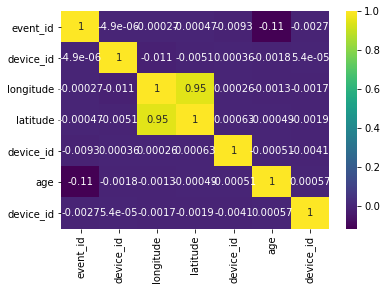

In [230]:
 #Perform the data visualization on the dataset to gain some basic insights 
sns.heatmap(dfc.corr(),annot=True,cmap='viridis')
plt.show()

In [231]:
dfcr.dtypes


event_id          int64
device_id         int64
timestamp        object
longitude       float64
latitude        float64
device_id       float64
gender           object
age             float64
group            object
device_id       float64
phone_brand      object
device_model     object
dtype: object

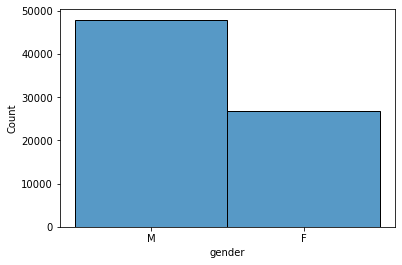

In [232]:
sns.histplot(df1['gender'])
plt.show()

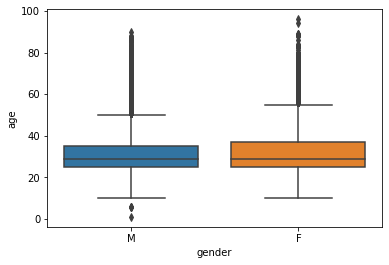

In [233]:
sns.boxplot(df1['gender'],df1['age'])
plt.show()

In [234]:
dfcr.drop('event_id',axis=1,inplace=True)

In [235]:
dfcr.drop('device_id',axis=1,inplace=True)

In [236]:
x=dfcr.drop('timestamp',axis=1,inplace=True)
display(x)

None

In [237]:
dfcr.columns

Index(['longitude', 'latitude', 'gender', 'age', 'group', 'phone_brand',
       'device_model'],
      dtype='object')

In [238]:
dfcr.drop('gender',axis=1,inplace=True)

In [239]:
dfcr.drop('phone_brand',axis=1,inplace=True)

In [240]:
dfcr.drop('device_model',axis=1,inplace=True)

In [241]:
dfcr.drop('group',axis=1,inplace=True)

In [242]:
dfcr

,longitude,latitude,age
0,121.38,31.24,35.0
1,103.65,30.97,35.0
2,106.60,29.70,35.0
3,104.27,23.28,30.0
4,115.88,28.66,30.0
...,...,...,...
74640,0.00,0.00,30.0
74641,0.00,0.00,30.0
74642,113.52,22.23,20.0
74643,121.37,31.25,37.0


In [243]:
## Lets recheck the missing values
dfcr.isnull().sum()

longitude    0
latitude     0
age          0
dtype: int64

In [244]:
#Encode the categorical variables in the dataset.
#   Drop irrelevant columns like 'timestamp','event_id','device_id' etc from the dataset.e
object_type_variables = [i for i in dfcr.columns if dfcr.dtypes[i] == object]
object_type_variables 


le = LabelEncoder()
def encoder(dfc):
    for i in object_type_variables:
        q = le.fit_transform(dfcr[i].astype(str))  
        dfcr[i] = q                               
        dfcr[i] = dfcr[i].astype(int)
encoder(dfcr)        



In [245]:
import mysql.connector
mydb= mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="Yuva@2022"
    )
print(mydb)

In [246]:
import mysql.connector
mydb= mysql.connector.connect(
    host="localhost",
    user="Thenmozhi",
    passwd="Yuva@2022"
    )
print(mydb)

In [247]:
import mysql.connector
mydb= mysql.connector.connect(
    host="localhost",
    user="Thenmozhi",
    passwd="Yuva@2022",
    database="customerchurn"
    )
print(mydb)

In [248]:
## standardizing the data using standard scalar
from pandas import DataFrame
ss = StandardScaler()
X_scaled = ss.fit_transform(dfcr)

X_scaled = pd.DataFrame(X_scaled,columns=dfcr.columns)
X_scaled.head(2)

,longitude,latitude,age
0,0.802984,0.612426,0.363743
1,0.474870,0.595207,0.363743


In [249]:
dfcr

,longitude,latitude,age
0,121.38,31.24,35.0
1,103.65,30.97,35.0
2,106.60,29.70,35.0
3,104.27,23.28,30.0
4,115.88,28.66,30.0
...,...,...,...
74640,0.00,0.00,30.0
74641,0.00,0.00,30.0
74642,113.52,22.23,20.0
74643,121.37,31.25,37.0


In [251]:
cov_matrix = np.cov(X_scaled.T)
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 
 [[ 1.00001340e+00  9.46588624e-01 -1.26823894e-03]
 [ 9.46588624e-01  1.00001340e+00 -4.86519333e-04]
 [-1.26823894e-03 -4.86519333e-04  1.00001340e+00]]


In [252]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [253]:
total = sum(eig_vals)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [64.88591898587678, 33.333289878115146, 1.7807911360080722]
Cummulative Variance Explained:  [ 64.88591899  98.21920886 100.        ]


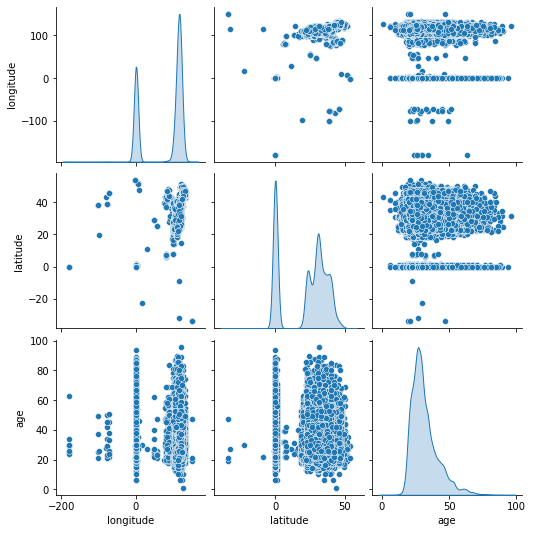

In [254]:
sns.pairplot(dfcr, diag_kind='kde') 

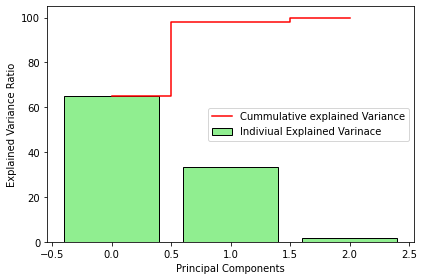

In [255]:
plt.bar(range(3),var_exp, align='center',color='lightgreen',edgecolor='black',label='Indiviual Explained Varinace')
plt.step(range(3), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

In [256]:
## Lets create a copy of the original dataframe and name the copy as df_scaled
df_scaled = dfcr.copy()

In [257]:
## Standardize the data using standard scalar
ss = StandardScaler()

df_scaled.iloc[:,:] = ss.fit_transform(df_scaled.iloc[:,:])

In [258]:
df_scaled.head(2)

,longitude,latitude,age
0,0.802984,0.612426,0.363743
1,0.474870,0.595207,0.363743


In [259]:
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(df_scaled)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,1,223935.000000
1,2,83373.911684
2,3,49887.369824
3,4,34494.399015
4,5,26463.144690
5,6,22659.197763
6,7,18894.039926
7,8,16325.895334
8,9,14399.152061
9,10,12562.556448


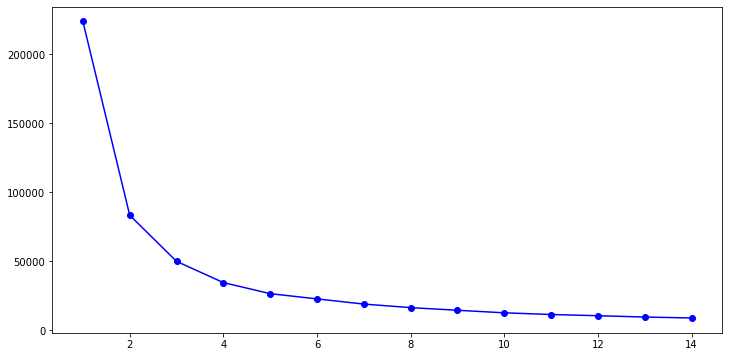

In [260]:
plt.figure(figsize=[12,6])
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

In [261]:
kmeans = KMeans(n_clusters=3, n_init=15, random_state=2345)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=15, random_state=2345)

In [262]:
## obtained labels from kmeans clustering
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [263]:
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))

df_labels.head(5)

,Labels
0,1
1,1
2,1
3,1
4,1


In [264]:
df_labels['Labels'] = df_labels['Labels'].astype('category')

In [265]:
df_kmeans = dfcr.join(df_labels)

df_kmeans.head()

,longitude,latitude,age,Labels
0,121.38,31.24,35.0,1
1,103.65,30.97,35.0,1
2,106.60,29.70,35.0,1
3,104.27,23.28,30.0,1
4,115.88,28.66,30.0,1


In [266]:
df_kmeans['Labels'].value_counts()

1    40012
2    23736
0    10897
Name: Labels, dtype: int64

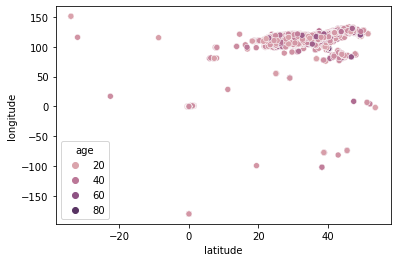

In [267]:
sns.scatterplot(df_kmeans['latitude'],df_kmeans['longitude'],hue='age',data=df_kmeans)
plt.show()

In [270]:

kmeans_score = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(df_scaled)
    labels = kmeans.predict(df_scaled)
    print(i,silhouette_score(df_scaled,labels))

In [ ]:
plt.figure(figsize=[18,7])
merg = linkage(df_scaled, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
hie_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean',
                                     linkage='ward')

hie_cluster_model = hie_cluster.fit(df_scaled)

In [ ]:
## Creating a dataframe of the labels

df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(2)

In [269]:
## joining the label dataframe with unscaled initial dataframe.(df)

df_hier = df.join(df_label1)
df_hier.head()



NameError: name 'df_label1' is not defined

In [ ]:
plt.title('K-Means Classes')
sns.scatterplot(x='latitude',y='longitude',hue='age',data=df_kmeans,palette='bright')
plt.show()

plt.title('Hierarchical Classes')
sns.scatterplot(x='latitude',y='longitude',hue='age',data=df_hier,palette='bright')
plt.show()